In [48]:
# Section must be included at the beginning of each new notebook.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

In [49]:
# Import pandas library to do data prepration and cleaning
# Import dataset training set + test set

import pandas
dfTraining= pandas.read_csv('AdultTrain.csv')
dfTest= pandas.read_csv('AdultTest.csv')

In [50]:
# 2.3 Data Explore
#View traing dataset
dfTraining

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [51]:
#View test dataset
dfTest

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,>50K


In [52]:
# 2.4 Verify the Data Quality
# Looking for missing values in training set, result 4262
dfTraining.isnull().values.sum()

0

In [53]:
#Looking for missing values in test set, result 901
dfTest.isnull().values.sum()

4

In [54]:
# 3.1 Select the Data
# Combine the training set and the test set to a single dataframe
# The result dataframe is called dfCombinedDataset
dfCombinedDataset = pandas.concat([dfTraining,dfTest])


In [55]:
# The initial training set has 32561 rows and 15 columns
dfTraining.shape

(32561, 15)

In [56]:
# The initial test set has 32561 rows and 15 columns
dfTest.shape

(6186, 15)

In [57]:
# The combined set has 38747 rows and 15 columns,
# which is the sum of (rows in the training set + rows in the test set) 
# and the same number of columns
dfCombinedDataset.shape

(38747, 15)

In [58]:
# View the combined dataset as follow
dfCombinedDataset

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,>50K


In [59]:
# 3.2 Clean the Data
# See how many rows have missing values in the column
dfCombinedDataset.isnull().values.sum()

4

In [60]:
#Delete rows with mssing values in the combined dataset, rename the dataframe as "dfAfterClean"
dfAfterRemoveNull = dfCombinedDataset.dropna()

In [61]:
#The cleaned dataset result 0 missing values
dfAfterRemoveNull.isnull().values.sum()

0

In [62]:
# The cleaned dataset reducing number of rows 
dfAfterRemoveNull.shape

(38746, 15)

In [63]:
# View the cleaned dataset as below
dfAfterRemoveNull

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,>50K


In [64]:
# Reomve all the rows which contains "?" value
dfAfterClean= dfAfterRemoveNull.mask(dfAfterRemoveNull.eq(' ?')).dropna()

In [65]:
dfAfterClean

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,>50K


In [66]:
dfAfterClean.shape

(35847, 15)

In [67]:
# 3.5 Format the Data
# Replace the "Reulst" column name to "Exceed_50K"
dfAfterRename=dfAfterClean.rename(columns = {'Result':'Exceed_50K'})

In [77]:
dfAfterRename

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,>50K


In [105]:
# Rename "<=50K" to 0
dfAfterRename1= dfAfterRename.replace(" <=50K", 0)
# Rename ">50K" to 1
dfAfterFormat= dfAfterRename1.replace(" >50K", 1)
# See the result, the "Result" column renamed to "Exceed_50K"
# Now the "Exceed-50K" column now has binary value - 1 and 0

dfAfterFormat['Exceed_50K'] = dfAfterFormat['Exceed_50K'].astype(float)
dfAfterFormat

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,1.0


In [80]:
# 4.1 Reduce the Data
# Remove cloumn "Fnlwg" and "Education_Num" as they are unique values and have no meaning
dfAfterFormat.drop(['Fnlwgt', 'Education_Num'],axis = 1, inplace = True)

In [81]:
# The result dataset removed the column "Fnlwg" and "Education_Num" as shown below
dfAfterFormat

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,1.0


In [82]:
# The new number of columns is 13 (15-2)
list(dfAfterFormat)

dfAfterFormat.shape

(35847, 13)

In [83]:
# 4.2 Project the Data
dfAfterFormat.dtypes

Age                 int64
Workclass          object
Education          object
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain        int64
Capital_Loss      float64
Hours_Per_Week    float64
Native_Country     object
Exceed_50K        float64
dtype: object

In [84]:
#Some of the "object" colunms have too many distinct values, 
#which would provide misleading informtaion to the end result
dfAfterFormat.nunique()

Age                72
Workclass           7
Education          16
Marital_Status      7
Occupation         14
Relationship        6
Race                5
Sex                 2
Capital_Gain      118
Capital_Loss       90
Hours_Per_Week     94
Native_Country     41
Exceed_50K          2
dtype: int64

In [85]:
# View what are the distinct values in each of the columns 
# 1) Workclass column
dfAfterFormat.Workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [86]:
# Combine values in the Workclass column
dcWorkclass1 = dict.fromkeys([' State-gov',' Federal-gov',' Local-gov'], 'Government')
dfWorkclass1 = dfAfterFormat.replace(dcWorkclass1)

dcWorkclass2 = dict.fromkeys([' Self-emp-not-inc',' Self-emp-inc'], 'Self-Employment')
dfWorkclass2= dfWorkclass1.replace(dcWorkclass2)

In [87]:
dfWorkclass2

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-Employment,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-Employment,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,1.0


In [88]:
# View what are the distinct values in each of the columns 
# 2) "Education" column
dfWorkclass2.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [89]:
# Combine values in the Education column
dcEducation1 = dict.fromkeys([' Bachelors',' Some-college',' Assoc-acdm',' Assoc-voc',' Masters',' Doctorate'], 'High')
dfEducation1 = dfWorkclass2.replace(dcEducation1)

dcEducation2 = dict.fromkeys([' HS-grad',' Prof-school'], 'Medium')
dfEducation2 = dfEducation1.replace(dcEducation2)

dcEducation3 = dict.fromkeys([' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' 12th', ' 1st-4th'], 'Low')
dfEducation3 = dfEducation2.replace(dcEducation3)

dfEducation3

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,High,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-Employment,High,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,Medium,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,Low,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,High,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,High,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,Low,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-Employment,Medium,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,High,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,High,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,1.0


In [90]:
# View what are the distinct values in each of the columns 
# 3) "Marital_Status" column
dfEducation3.Marital_Status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [91]:
# Combine values in the Marital_Status column
dcMaritalStatus1 = dict.fromkeys([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
dfMaritalStatus1 = dfEducation3.replace(dcMaritalStatus1)

dcMaritalStatus2 = dict.fromkeys([' Never-married',' Divorced',' Married-AF-spouse'], 'Single')
dfMaritalStatus2 = dfMaritalStatus1.replace(dcMaritalStatus2)

dfMaritalStatus2

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,High,Single,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-Employment,High,Married,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,Medium,Single,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,Low,Married,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,High,Married,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,High,Married,Exec-managerial,Wife,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,Low,Married,Other-service,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-Employment,Medium,Married,Exec-managerial,Husband,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,High,Single,Prof-specialty,Not-in-family,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,High,Married,Exec-managerial,Husband,White,Male,5178,0.0,40.0,United-States,1.0


In [92]:
# View what are the distinct values in each of the columns 
# 4) "Occupation" column
dfMaritalStatus2.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [93]:
# Combine values in the Occupation column
dcOccupation1 = dict.fromkeys([' Tech-support'], 'Technical')
dfOccupation1 = dfMaritalStatus2.replace(dcOccupation1)

dcOccupation2 = dict.fromkeys([' Craft-repair',' Handlers-cleaners',' Machine-op-inspct',' Farming-fishing',' Transport-moving'], 'Labour')
dfOccupation2 = dfOccupation1.replace(dcOccupation2)

dcOccupation3 = dict.fromkeys([' Exec-managerial'], 'Management')
dfOccupation3 = dfOccupation2.replace(dcOccupation3)

dcOccupation4 = dict.fromkeys([' Prof-specialty'], 'Professional')
dfOccupation4 = dfOccupation3.replace(dcOccupation4)

dcOccupation5 = dict.fromkeys([' Adm-clerical'], 'Administration')
dfOccupation5 = dfOccupation4.replace(dcOccupation5)

dcOccupation6 = dict.fromkeys([ ' Other-service',' Protective-serv',' Priv-house-serv'  ], 'Serivce')
dfOccupation6 = dfOccupation5.replace(dcOccupation6)

dfOccupation6

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,High,Single,Administration,Not-in-family,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-Employment,High,Married,Management,Husband,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,Medium,Single,Labour,Not-in-family,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,Low,Married,Labour,Husband,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,High,Married,Professional,Wife,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,High,Married,Management,Wife,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,Low,Married,Serivce,Not-in-family,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-Employment,Medium,Married,Management,Husband,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,High,Single,Professional,Not-in-family,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,High,Married,Management,Husband,White,Male,5178,0.0,40.0,United-States,1.0


In [94]:
# View what are the distinct values in each of the columns 
# 5) "Relationship" column
dfOccupation6.Relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [95]:
# Combine values in the Relationship column
dcRelationship1 = dict.fromkeys([' Husband', ' Wife'], 'Married')
dfRelationship1 = dfOccupation6.replace(dcRelationship1)

dcRelationship2 = dict.fromkeys([' Not-in-family',' Own-child', ' Unmarried'], 'Single')
dfRelationship2 = dfRelationship1.replace(dcRelationship2)

dfRelationship2

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,High,Single,Administration,Single,White,Male,2174,0.0,40.0,United-States,0.0
1,50,Self-Employment,High,Married,Management,Married,White,Male,0,0.0,13.0,United-States,0.0
2,38,Private,Medium,Single,Labour,Single,White,Male,0,0.0,40.0,United-States,0.0
3,53,Private,Low,Married,Labour,Married,Black,Male,0,0.0,40.0,United-States,0.0
4,28,Private,High,Married,Professional,Married,Black,Female,0,0.0,40.0,Cuba,0.0
5,37,Private,High,Married,Management,Married,White,Female,0,0.0,40.0,United-States,0.0
6,49,Private,Low,Married,Serivce,Single,Black,Female,0,0.0,16.0,Jamaica,0.0
7,52,Self-Employment,Medium,Married,Management,Married,White,Male,0,0.0,45.0,United-States,1.0
8,31,Private,High,Single,Professional,Single,White,Female,14084,0.0,50.0,United-States,1.0
9,42,Private,High,Married,Management,Married,White,Male,5178,0.0,40.0,United-States,1.0


In [96]:
# View what are the distinct values in each of the columns 
# 5) "Native_Country" column
dfRelationship2.Native_Country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [97]:
# Combine values in the Native_Country column
dcNativeCountry1 = dict.fromkeys([ ' Hong',' Cambodia',' Iran',' Laos',' India',' Taiwan',' Thailand',' Vietnam',' Japan',' China',' Philippines' ], 'Asia')
dfNativeCountry1 = dfRelationship2.replace(dcNativeCountry1)

dcNativeCountry2 = dict.fromkeys([' Holand-Netherlands',' England', ' Portugal',' Greece', ' Germany',' Poland',' Yugoslavia',' Hungary',' Italy',' Scotland',' Ireland',' France' ], 'Europe')
dfNativeCountry2 = dfNativeCountry1.replace(dcNativeCountry2)

dcNativeCountry3 = dict.fromkeys([' Guatemala', ' Canada',' Outlying-US(Guam-USVI-etc)',' Jamaica', ' United-States',' Cuba',' Dominican-Republic',' Honduras',' El-Salvador',' Puerto-Rico',' Nicaragua',' Mexico',' Haiti'], 'North America')
dfNativeCountry3 = dfNativeCountry2.replace(dcNativeCountry3)

dcNativeCountry4 = dict.fromkeys([' Peru',' Trinadad&Tobago',' South','South America',' Ecuador', ' Columbia'], 'South America')
dfNativeCountry4 = dfNativeCountry3.replace(dcNativeCountry4)

dfNativeCountry4


,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,High,Single,Administration,Single,White,Male,2174,0.0,40.0,North America,0.0
1,50,Self-Employment,High,Married,Management,Married,White,Male,0,0.0,13.0,North America,0.0
2,38,Private,Medium,Single,Labour,Single,White,Male,0,0.0,40.0,North America,0.0
3,53,Private,Low,Married,Labour,Married,Black,Male,0,0.0,40.0,North America,0.0
4,28,Private,High,Married,Professional,Married,Black,Female,0,0.0,40.0,North America,0.0
5,37,Private,High,Married,Management,Married,White,Female,0,0.0,40.0,North America,0.0
6,49,Private,Low,Married,Serivce,Single,Black,Female,0,0.0,16.0,North America,0.0
7,52,Self-Employment,Medium,Married,Management,Married,White,Male,0,0.0,45.0,North America,1.0
8,31,Private,High,Single,Professional,Single,White,Female,14084,0.0,50.0,North America,1.0
9,42,Private,High,Married,Management,Married,White,Male,5178,0.0,40.0,North America,1.0


In [98]:
# The result dataframe is called "dfAfterProject"
# And the number of distinct values has dropped significantly
dfAfterProject = dfNativeCountry4
dfAfterProject.nunique()

Age                72
Workclass           4
Education           4
Marital_Status      4
Occupation          8
Relationship        3
Race                5
Sex                 2
Capital_Gain      118
Capital_Loss       90
Hours_Per_Week     94
Native_Country      4
Exceed_50K          2
dtype: int64

In [99]:
dfAfterProject

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Exceed_50K
0,39,Government,High,Single,Administration,Single,White,Male,2174,0.0,40.0,North America,0.0
1,50,Self-Employment,High,Married,Management,Married,White,Male,0,0.0,13.0,North America,0.0
2,38,Private,Medium,Single,Labour,Single,White,Male,0,0.0,40.0,North America,0.0
3,53,Private,Low,Married,Labour,Married,Black,Male,0,0.0,40.0,North America,0.0
4,28,Private,High,Married,Professional,Married,Black,Female,0,0.0,40.0,North America,0.0
5,37,Private,High,Married,Management,Married,White,Female,0,0.0,40.0,North America,0.0
6,49,Private,Low,Married,Serivce,Single,Black,Female,0,0.0,16.0,North America,0.0
7,52,Self-Employment,Medium,Married,Management,Married,White,Male,0,0.0,45.0,North America,1.0
8,31,Private,High,Single,Professional,Single,White,Female,14084,0.0,50.0,North America,1.0
9,42,Private,High,Married,Management,Married,White,Male,5178,0.0,40.0,North America,1.0


In [100]:
# 6.2
# Convert pandas code to pySpark code
dfSpark = spark.createDataFrame(dfAfterProject)
dfSpark.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Capital_Gain: long (nullable = true)
 |-- Capital_Loss: double (nullable = true)
 |-- Hours_Per_Week: double (nullable = true)
 |-- Native_Country: string (nullable = true)
 |-- Exceed_50K: double (nullable = true)



In [101]:
# First create a string indexer which converts every string into a number
# A number will be assigned to every category in the column.

from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

workclass_indexer = StringIndexer(inputCol='Workclass',outputCol='workclasslIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
marital_Status_indexer = StringIndexer(inputCol='Marital_Status',outputCol='marital_StatusIndex')
occupation_indexer = StringIndexer(inputCol='Occupation',outputCol='occupationIndex')
relationship_indexer = StringIndexer(inputCol='Relationship',outputCol='relationshipIndex')
race_indexer = StringIndexer(inputCol='Race',outputCol='raceIndex')
sex_indexer = StringIndexer(inputCol='Sex',outputCol='sexIndex')
native_Country_indexer = StringIndexer(inputCol='Native_Country',outputCol='native_CountryIndex')


# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
workclass_encoder = OneHotEncoder(inputCol='workclasslIndex',outputCol='workclassVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
marital_Statust_encoder = OneHotEncoder(inputCol='marital_StatusIndex',outputCol='marital_StatusVec')
occupation_encoder = OneHotEncoder(inputCol='occupationIndex',outputCol='occupationVec')
relationship_encoder = OneHotEncoder(inputCol='relationshipIndex',outputCol='relationshipVec')
race_encoder = OneHotEncoder(inputCol='raceIndex',outputCol='raceVec')
sex_encoder = OneHotEncoder(inputCol='sexIndex',outputCol='sexVec')
native_Country_encoder = OneHotEncoder(inputCol='native_CountryIndex',outputCol='native_CountryVec')


# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['workclassVec','educationVec','marital_StatusVec','occupationVec',
                                       'relationshipVec','raceVec','sexVec','native_CountryVec',
                                       'Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week'], outputCol="features")

In [102]:
from pyspark.ml import Pipeline

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[workclass_indexer,education_indexer,marital_Status_indexer, occupation_indexer,
                            relationship_indexer,race_indexer,sex_indexer,native_Country_indexer,
                            workclass_encoder,education_encoder,marital_Statust_encoder,occupation_encoder,
                            relationship_encoder,race_encoder,sex_encoder,native_Country_encoder,
                            assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(dfSpark)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(dfSpark)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('features', 'Exceed_50K')

In [104]:
# 7.1
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='Exceed_50K')
# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)


Training Dataset Count: 24958
Test Dataset Count: 10889


In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

<Figure size 640x480 with 1 Axes>

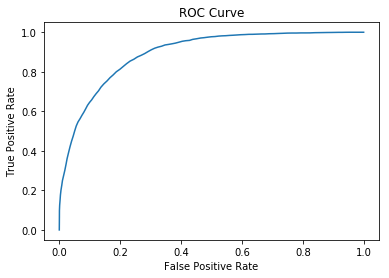

Area Under the Curve: 0.8931216072551342


In [108]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

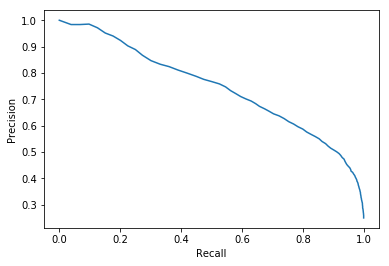

In [109]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()